In [1]:
%matplotlib inline

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
# from matplotlib import colors
# import numpy as np
# from descartes import PolygonPatch
import csv

# Loading or Reading of Datasets

Datasets used and their formats include:
<ul>
    <li><strong>Chicago</strong> - ESRI Shapefile for the City of Chicago, subdivided into 77 communities.</li>
    <li><strong>Sex Crimes</strong> - A CSV file containing reported Sexual Offences (and their GPS locations), that have been extracted from a larger crimes dataset for the City of Chicago</li>
    <li><strong>SocioEconomic Indicators</strong> - A csv file containing selected indicators showing the social and economic indicators for the communities within City of Chicago</li>
    <li><strong>Sexually Transmitted Infections</strong> - A csv file of reported Gonorrhoea and Chlamydia cases within the communities of the larger City of Chicago</li>
</ul>
   

Functions for loading of either the CSV files or ESRI shapefiles into Pandas or Geopandas dataframes, respectively.

In [3]:
def load_shp(file):
    """
    A function to read a Shapefile into a geopandas data structure.
    
    Parameters
        
        file: str, required
            Directory path to location of the Shapefile data
    
    Returns
        
        Returns a GeoPandas dataframe of type/class 'geopandas.geodataframe.GeoDataFrame'
    
    Usage Example
        
        >>> data = load_shp('path/to/shapefile.shp')    
    
    """
    
    return gpd.read_file(file)

def load_csv(file):
    """
    A function to read a csv file into a Pandas data stucture.
    
    Parameters
        
        file: str, required
            A string with the directory path of the csv file to be read and converted into a 
            Pandas data structure
    
    Returns
        
        Returns a Pandas data frame
    
    Usage:
        
        >>> data = load_csv('path/to/csvFile.csv')    
    
    """
    
    return pd.read_csv(file)

## 1. Area of Study - City of Chicago

In [4]:
# Read or load the shapefile content into a geodataframe
Chicago = load_shp('data/CityOfChicago.shp')

In [5]:
# Display a brief listing of the geopandas dataframe content and heading
Chicago.head()

OBJECTID        community          area  AreaNum   Shape_Leng  \
0       1.0          Douglas  4.273986e+06       35  9457.065256   
1       2.0          Oakland  1.571365e+06       36  5963.578433   
2       3.0      Fuller Park  1.850330e+06       37  7723.369962   
3       4.0  Grand Boulevard  4.505119e+06       38  8594.413016   
4       5.0          Kenwood  2.700864e+06       39  7109.525167   

     Shape_Area                                           geometry  
0  4.273986e+06  POLYGON ((360144.247 575106.337, 360143.622 57...  
1  1.571365e+06  POLYGON ((361581.719 572034.768, 361568.820 57...  
2  1.850330e+06  POLYGON ((358550.673 570339.105, 358551.130 57...  
3  4.505119e+06  POLYGON ((360372.479 572011.602, 360372.975 57...  
4  2.700864e+06  POLYGON ((361581.719 572034.768, 361582.151 57...

### Map of the study area

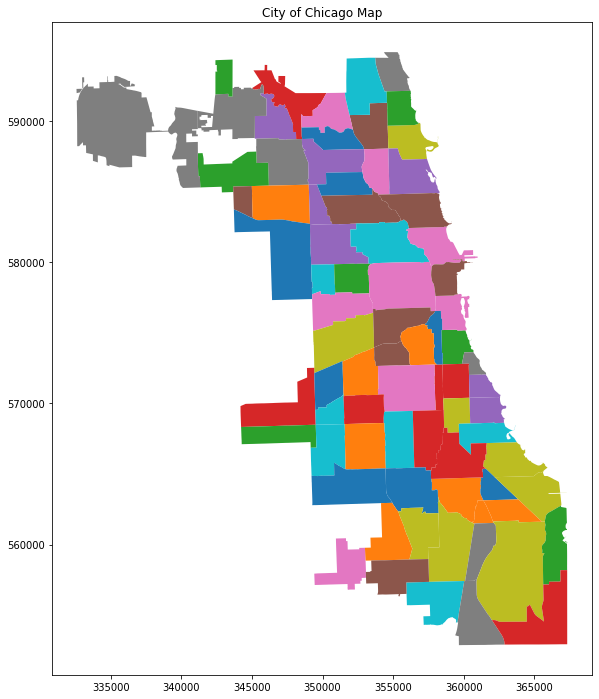

In [6]:
# To plot and visualize our data
f,ax = plt.subplots(1, figsize=(12,12))
ax = Chicago.plot(ax=ax, column='community')
ax.set_title('City of Chicago Map')
plt.show()

#### Working Coordinate Reference System

In [7]:
# Coordinate reference systems of our data
Chicago.crs

<Projected CRS: EPSG:6454>
Name: NAD83(2011) / Illinois East
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Illinois - SPCS - E
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### 2. Chicago Crimes - map of reported Sexual Offenses

In [8]:
# THIS IS A REALLY LARGE FILE
# Using the code (commented) below will lead to jamming up our RAM.

#chicago_crimes = load_shp('data/ChicagoCrimes.shp')
#chicago_crimes.head()

# TO avoid this, we parse the large file, read each line in the file, filter for sex-related offences 
#and write the data to a new csv file - which we will use here.

with open('data/ChicagoCrimes.csv','r') as file:
    with open('data/analysis_ready_data/SexCrimes.csv','w') as outfile:
        reader = csv.reader(file, delimiter=',')
        header = next(reader) # read header row
        #print(header)
        writer = csv.writer(outfile)
        writer.writerow(header)
        
        for row in reader:
            if row[5] == 'SEX OFFENCES' or row[5] == 'CRIM SEXUAL ASSAULT': # Filter for the sex related crimes
                writer.writerow(row)

# NOW we can load up our data using the function 'load_csv()'


In [9]:
# Load the extracted data on sexual offences
sex_crimes = load_csv('data/analysis_ready_data/SexCrimes.csv')
sex_crimes.head()

ID Case Number            Date                 Block  IUCR  \
0  7297088    HS100422   1/1/2010 2:00      135XX S AVENUE L   281   
1  7297218    HS100542   1/1/2010 0:01       001XX W LAKE ST   281   
2  7297577    HS100287   1/1/2010 2:50     018XX N DAMEN AVE   281   
3  7297788    HS101348  1/1/2010 22:40  050XX S MICHIGAN AVE   291   
4  7298731    HS102422   1/1/2010 3:15    021XX N SAWYER AVE   281   

          Primary Type             Description    Location Description  \
0  CRIM SEXUAL ASSAULT          NON-AGGRAVATED               RESIDENCE   
1  CRIM SEXUAL ASSAULT          NON-AGGRAVATED               CTA TRAIN   
2  CRIM SEXUAL ASSAULT          NON-AGGRAVATED  VEHICLE NON-COMMERCIAL   
3  CRIM SEXUAL ASSAULT  ATTEMPT NON-AGGRAVATED               APARTMENT   
4  CRIM SEXUAL ASSAULT          NON-AGGRAVATED               APARTMENT   

   Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0   False     False  ...    10              55         2       1202095   
1   False     False  ...    42              32         2       1175359   
2   False     False  ...    32              22         2       1162739   
3    True      True  ...     3              38         2       1178011   
4   False     False  ...    26              22         2       1154163   

   Y Coordinate  Year     Updated On   Latitude  Longitude  \
0       1815923  2010  2/4/2016 6:33  41.649625 -87.536242   
1       1901736  2010  2/4/2016 6:33  41.885742 -87.631499   
2       1912100  2010  2/4/2016 6:33  41.914456 -87.677551   
3       1871623  2010  2/4/2016 6:33  41.803050 -87.622675   
4       1914022  2010  2/4/2016 6:33  41.919906 -87.709006   

                        Location  
0  (41.649625081, -87.536241539)  
1  (41.885742471, -87.631498734)  
2  (41.914455953, -87.677550855)  
3  (41.803050325, -87.622675191)  
4  (41.919905701, -87.709006491)  

[5 rows x 22 columns]

Convert this pandas dataframe to a geodataframe - <strong>Spatialize our dataset</strong>

In [10]:
# Generate a geopandas datafrom from the current pandas dataframe - spatialize the file
geometry = [Point(xy) for xy in zip(sex_crimes['Longitude'],sex_crimes['Latitude'])] # Using Lon,Lat with WGS84 CRS
crs = {'init':'epsg:4326'}

gdf = gpd.GeoDataFrame(sex_crimes,crs=crs, geometry=geometry)

/home/calvin/Env/chicago_project-AhtyV_Ks/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [11]:
# Reproject the geodataframe to the same CRS as the Chicago dataset
gdf_crimes = gdf.to_crs(Chicago.crs) 
gdf_crimes.crs

<Projected CRS: EPSG:6454>
Name: NAD83(2011) / Illinois East
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Illinois - SPCS - E
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Range in years for this dataset

In [12]:
# Year range for the sex crimes data
f"Data ranges from the years {gdf_crimes.Year.min()} to {gdf_crimes.Year.max()} "

'Data ranges from the years 2010 to 2016 '

#### Visualize the reported sexual offences crimes overlaid over map of the City of Chicago

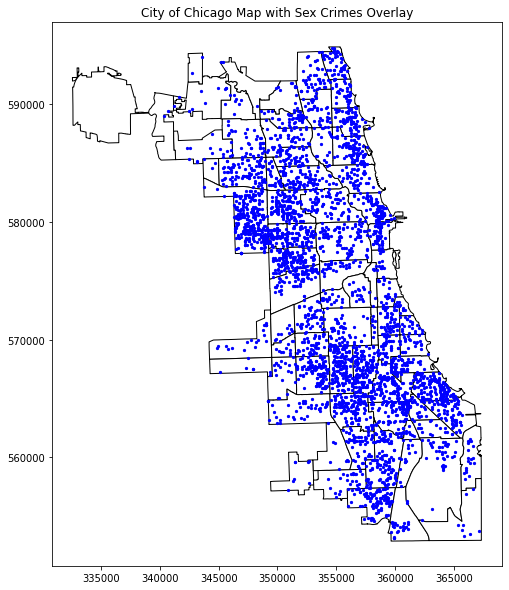

In [13]:
# Plot the two -  map of Chicago and crime locations -  overlaid and on the same map
fig,ax = plt.subplots(1, figsize=(10,10))
ax.set_aspect('equal')
Chicago.plot(color='white', ax=ax, edgecolor='black')
gdf_crimes.plot(ax=ax, marker='o',color='blue', markersize=5)
ax.set_title('City of Chicago Map with Sex Crimes Overlay')
plt.show()

### 3. SocioEconomic Indicators

In [14]:
socioEcon_Indicators = load_csv('data/SocioEconomic_Indicators_2K8_2K12.csv')
socioEcon_Indicators.head()

OBJECTID  Community_Area_Number Community_Area_Name  \
0         1                      1         Rogers Park   
1         2                      2          West Ridge   
2         3                      3              Uptown   
3         4                      4      Lincoln Square   
4         5                      5        North Center   

   PERCENT_OF_HOUSING_CROWDED  PERCENT_HOUSEHOLDS_BELOW_POVERTY  \
0                         7.7                              23.6   
1                         7.8                              17.2   
2                         3.8                              24.0   
3                         3.4                              10.9   
4                         0.3                               7.5   

   PERCENT_AGED_16__UNEMPLOYED  PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA  \
0                          8.7                                          18.2   
1                          8.8                                          20.8   
2                          8.9                                          11.8   
3                          8.2                                          13.4   
4                          5.2                                           4.5   

   PERCENT_AGED_UNDER_18_OR_OVER_64  PER_CAPITA_INCOME  HARDSHIP_INDEX  
0                              27.5              23939              39  
1                              38.5              23040              46  
2                              22.2              35787              20  
3                              25.5              37524              17  
4                              26.2              57123               6

In [15]:
# List the columns on this dataframe
socioEcon_Indicators.columns

Index(['OBJECTID', 'Community_Area_Number', 'Community_Area_Name',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

### 4. Datasets on reported Chlamydia and Gonorrhoea Cases

#### A. Chlamydia
##### i). Females aged between 15 year and 44 year over period between 2000 and 2014

In [16]:
chlam_f = load_csv('data/chlamydia_F_15_44yrs_2K_2K14.csv')
chlam_f.head()

OBJECTID  Community_Area Community_Area_Name  Cases_2000_Female_15_44  \
0         1               1         Rogers Park                      258   
1         2               2          West Ridge                       69   
2         3               3              Uptown                      169   
3         4               4      Lincoln Square                       51   
4         5               5        North Center                       26   

   Incidence_Rate_2000  Cases_2001_Female_15_44  Incidence_Rate_2001  \
0               1522.1                      217               1298.5   
1                439.9                       66                422.9   
2               1079.7                      157               1009.5   
3                431.3                       59                501.8   
4                277.1                       35                373.1   

   Cases_2002_Female_15_44  Incidence_Rate_2002  Cases_2003_Female_15_44  ...  \
0                      229               1390.1                      224  ...   
1                       71                457.2                       67  ...   
2                      133                860.8                      127  ...   
3                       45                385.0                       43  ...   
4                       28                298.5                       30  ...   

   Cases_2010_Female_15_44  Incidence_Rate_2010  Cases_2011_Female_15_44  \
0                      211               1448.0                      222   
1                       98                657.9                      171   
2                      100                683.1                      106   
3                       62                556.8                       59   
4                       40                427.1                       42   

   Incidence_Rate_2011  Cases_2012_Female_15_44  Incidence_Rate_2012  \
0               1523.5                      218               1496.0   
1               1148.0                      149               1000.3   
2                724.1                      160               1093.0   
3                529.9                       64                574.8   
4                448.5                       36                384.4   

   Cases_2013_Female_15_44  Incidence_Rate_2013  Cases_2014_Female_15_44  \
0                      203               1393.1                      234   
1                      164               1101.0                      159   
2                      135                922.2                      177   
3                       66                592.7                       72   
4                       36                384.4                       39   

   Incidence_Rate_2014  
0               1605.8  
1               1067.5  
2               1209.1  
3                646.6  
4                416.4  

[5 rows x 33 columns]

#### Extract the necessary fields or columns

In [17]:
#create a list with only odd number
def odd_gen(start,end):
    return [i for i in range(start,end) if i%2==1]

In [18]:
lst_rnge = odd_gen(3,len(chlam_f.columns))
lst_rnge= sorted(lst_rnge+[0,2])
lst_rnge

[0, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [19]:
# Using the above generated list, slice and select the columns with reported values for the different years
chlam_f_data = chlam_f.iloc[:,lst_rnge]
chlam_f_data.head()

OBJECTID Community_Area_Name  Cases_2000_Female_15_44  \
0         1         Rogers Park                      258   
1         2          West Ridge                       69   
2         3              Uptown                      169   
3         4      Lincoln Square                       51   
4         5        North Center                       26   

   Cases_2001_Female_15_44  Cases_2002_Female_15_44  Cases_2003_Female_15_44  \
0                      217                      229                      224   
1                       66                       71                       67   
2                      157                      133                      127   
3                       59                       45                       43   
4                       35                       28                       30   

   Cases_2004_Female_15_44  Cases_2005_Female_15_44  Cases_2006_Female_15_44  \
0                      189                      184                      196   
1                      100                       95                      133   
2                      128                      147                      128   
3                       52                       67                       41   
4                       41                       32                       35   

   Cases_2007_Female_15_44  Cases_2008_Female_15_44  Cases_2009_Female_15_44  \
0                      212                      210                      192   
1                      113                      123                       97   
2                      136                      122                      116   
3                       57                       55                       46   
4                       29                       34                       32   

   Cases_2010_Female_15_44  Cases_2011_Female_15_44  Cases_2012_Female_15_44  \
0                      211                      222                      218   
1                       98                      171                      149   
2                      100                      106                      160   
3                       62                       59                       64   
4                       40                       42                       36   

   Cases_2013_Female_15_44  Cases_2014_Female_15_44  
0                      203                      234  
1                      164                      159  
2                      135                      177  
3                       66                       72  
4                       36                       39

##### ii) Males aged between 15 year and 44 year over period between 2000 and 2014

In [20]:
chlam_m = load_csv('data/chlamydia_M_15_44yrs_2K_2K14.csv')
chlam_m.head()

OBJECTID  Community_Area Community_Area_Name  CASES_2000_Male_15_44  \
0         1               1         Rogers Park                     89   
1         2               2          West Ridge                     21   
2         3               3              Uptown                     58   
3         4               4      Lincoln Square                     13   
4         5               5        North Center                     11   

   Incidence_Rate_2000  CASES_2001_Male_15_44  Incidence_Rate_2001  \
0                468.7                    108                580.6   
1                127.5                     31                189.3   
2                301.0                     93                489.8   
3                108.1                     11                 92.4   
4                113.3                     18                186.7   

   CASES_2002_Male_15_44  Incidence_Rate_2002  CASES_2003_Male_15_44  ...  \
0                    136                746.6                     84  ...   
1                     51                313.2                     32  ...   
2                    109                582.8                     88  ...   
3                     21                178.4                     24  ...   
4                     14                146.3                     16  ...   

   CASES_2010_Male_15_44  Incidence_Rate_2010  CASES_2011_Male_15_44  \
0                     94                621.7                    116   
1                     47                302.1                     71   
2                     66                401.7                     92   
3                     25                232.8                     26   
4                     10                110.9                     13   

   Incidence_Rate_2011  CASES_2012_MALE_15_44  Incidence_Rate_2012  \
0                767.2                    102                674.6   
1                456.4                     61                392.1   
2                560.0                    114                693.9   
3                242.1                     32                298.0   
4                144.2                     27                299.5   

   CASES_2013_Male_15_44  Incidence_Rate_2013  CASES_2014_Male_15_44  \
0                    135                892.9                    139   
1                     72                462.8                     78   
2                    144                876.4                    189   
3                     27                251.4                     34   
4                     29                321.7                     46   

   Incidence_Rate_2014  
0                919.3  
1                501.4  
2               1150.3  
3                316.6  
4                510.3  

[5 rows x 33 columns]

In [21]:
# Select the necessary field from this data
chlam_m_data = chlam_m.iloc[:,lst_rnge]
chlam_m_data.head()

OBJECTID Community_Area_Name  CASES_2000_Male_15_44  CASES_2001_Male_15_44  \
0         1         Rogers Park                     89                    108   
1         2          West Ridge                     21                     31   
2         3              Uptown                     58                     93   
3         4      Lincoln Square                     13                     11   
4         5        North Center                     11                     18   

   CASES_2002_Male_15_44  CASES_2003_Male_15_44  CASES_2004_Male_15_44  \
0                    136                     84                     92   
1                     51                     32                     36   
2                    109                     88                     89   
3                     21                     24                     24   
4                     14                     16                     13   

   CASES_2005_Male_15_44  CASES_2006_Male_15_44  CASES_2007_Male_15_44  \
0                     76                     81                     79   
1                     36                     41                     37   
2                     83                     91                     98   
3                     31                     12                     24   
4                     21                     15                     13   

   CASES_2008_Male_15_44  CASES_2009_Male_15_44  CASES_2010_Male_15_44  \
0                     71                     84                     94   
1                     30                     26                     47   
2                     83                     76                     66   
3                     24                     16                     25   
4                     17                     13                     10   

   CASES_2011_Male_15_44  CASES_2012_MALE_15_44  CASES_2013_Male_15_44  \
0                    116                    102                    135   
1                     71                     61                     72   
2                     92                    114                    144   
3                     26                     32                     27   
4                     13                     27                     29   

   CASES_2014_Male_15_44  
0                    139  
1                     78  
2                    189  
3                     34  
4                     46

#### A. Gonorrhoea
##### i) Females aged between 15 year and 44 year over period between 2000 and 2014

In [22]:
gono_f = load_csv('data/Gonorrhea_F_15_44yrs_2K_2K14.csv')
gono_f.head()

OBJECTID  Community_Area Community_Area_Name  Cases_2000_Female_15_44  \
0         1               1         Rogers Park                       84   
1         2               2          West Ridge                       14   
2         3               3              Uptown                       71   
3         4               4      Lincoln Square                        9   
4         5               5        North Center                        8   

   Incidence_Rate_2000  Cases_2001_Female_15_44  Incidence_Rate_2001  \
0                495.6                       88                526.6   
1                 89.3                       17                108.9   
2                453.6                       64                411.5   
3                 76.1                        7                 59.5   
4                 85.3                        5                 53.3   

   Cases_2002_Female_15_44  Incidence_Rate_2002  Cases_2003_Female_15_44  ...  \
0                       85                516.0                       70  ...   
1                       12                 77.3                       19  ...   
2                       56                362.5                       31  ...   
3                       14                119.8                        9  ...   
4                        9                 96.0                        9  ...   

   Cases_2010_Female_15_44  Incidence_Rate_2010  Cases_2011_Female_15_44  \
0                       53                363.7                       47   
1                       18                120.8                       21   
2                       26                177.6                       25   
3                        9                 80.8                       11   
4                       16                170.8                        8   

   Incidence_Rate_2011  Cases_2012_Female_15_44  Incidence_Rate_2012  \
0                322.5                       58                398.0   
1                141.0                       40                268.5   
2                170.8                       36                245.9   
3                 98.8                        9                 80.8   
4                 85.4                        6                 64.1   

   Cases_2013_Female_15_44  Incidence_Rate_2013  Cases_2014_Female_15_44  \
0                       45                308.8                       40   
1                       33                221.6                       16   
2                       22                150.3                       18   
3                        0                  NaN                        6   
4                        5                 53.4                        0   

   Incidence_Rate_2014  
0                274.5  
1                107.4  
2                123.0  
3                 53.9  
4                  NaN  

[5 rows x 33 columns]

In [23]:
# Slice and select the appropriate fields
gono_f_data = gono_f.iloc[:,lst_rnge]
gono_f_data.head()

OBJECTID Community_Area_Name  Cases_2000_Female_15_44  \
0         1         Rogers Park                       84   
1         2          West Ridge                       14   
2         3              Uptown                       71   
3         4      Lincoln Square                        9   
4         5        North Center                        8   

   Cases_2001_Female_15_44  Cases_2002_Female_15_44  Cases_2003_Female_15_44  \
0                       88                       85                       70   
1                       17                       12                       19   
2                       64                       56                       31   
3                        7                       14                        9   
4                        5                        9                        9   

   Cases_2004_Female_15_44  Cases_2005_Female_15_44  Cases_2006_Female_15_44  \
0                     45.0                     51.0                       58   
1                     28.0                     26.0                       28   
2                     43.0                     48.0                       33   
3                      8.0                     10.0                        9   
4                      5.0                      8.0                        0   

   Cases_2007_Female_15_44  Cases_2008_Female_15_44  Cases_2009_Female_15_44  \
0                       56                       46                       56   
1                       25                       25                       17   
2                       30                       28                       35   
3                       11                        8                        0   
4                        8                        5                        6   

   Cases_2010_Female_15_44  Cases_2011_Female_15_44  Cases_2012_Female_15_44  \
0                       53                       47                       58   
1                       18                       21                       40   
2                       26                       25                       36   
3                        9                       11                        9   
4                       16                        8                        6   

   Cases_2013_Female_15_44  Cases_2014_Female_15_44  
0                       45                       40  
1                       33                       16  
2                       22                       18  
3                        0                        6  
4                        5                        0

##### ii) Males aged between 15 year and 44 year over period between 2000 and 2014

In [24]:
gono_m = load_csv('data/Gonorrhea_M_15_44yrs_2K_2K14.csv')
gono_m.head()

OBJECTID  Community_Area Community_Area_Name  Cases_2000_Male_15_44  \
0         1               1         Rogers Park                    115   
1         2               2          West Ridge                     23   
2         3               3              Uptown                    165   
3         4               4      Lincoln Square                     17   
4         5               5        North Center                     14   

   Incidence_Rate_2000  Cases_2001_Male_15_44  Incidence_Rate_2001  \
0                605.6                    112                602.1   
1                139.7                     29                177.1   
2                856.3                    152                800.6   
3                141.3                     18                151.2   
4                144.2                     12                124.5   

   Cases_2002_Male_15_44  Incidence_Rate_2002  Cases_2003_Male_15_44  ...  \
0                    125                686.2                     83  ...   
1                     27                165.8                     22  ...   
2                    119                636.3                     97  ...   
3                     11                 93.4                      6  ...   
4                     16                167.2                     19  ...   

   Cases_2010_Male_15_44  Incidence_Rate_2010  Cases_2011_Male_15_44  \
0                     57                377.0                     64   
1                     20                128.6                     32   
2                     62                377.4                     77   
3                     16                149.0                     21   
4                      7                 77.7                     17   

   Incidence_Rate_2011  Cases_2012_Male_15_44  Incidence_Rate_2012  \
0                423.3                    102                674.6   
1                205.7                     37                237.8   
2                468.7                    137                833.8   
3                195.5                     15                139.7   
4                188.6                     18                199.7   

   Cases_2013_Male_15_44  Incidence_Rate_2013  Cases_2014_Male_15_44  \
0                    100                661.4                    112   
1                     30                192.8                     33   
2                    150                913.0                    235   
3                     17                158.3                     15   
4                     16                177.5                     17   

   Incidence_Rate_2014  
0                740.7  
1                212.1  
2               1430.3  
3                139.7  
4                188.6  

[5 rows x 33 columns]

In [25]:
# Select the appropriate fields
gono_m_data = gono_m.iloc[:,lst_rnge]
gono_m_data.head()

OBJECTID Community_Area_Name  Cases_2000_Male_15_44  Cases_2001_Male_15_44  \
0         1         Rogers Park                    115                    112   
1         2          West Ridge                     23                     29   
2         3              Uptown                    165                    152   
3         4      Lincoln Square                     17                     18   
4         5        North Center                     14                     12   

   Cases_2002_Male_15_44  Cases_2003_Male_15_44  Cases_2004_Male_15_44  \
0                    125                     83                     64   
1                     27                     22                     14   
2                    119                     97                    107   
3                     11                      6                     11   
4                     16                     19                     13   

   Cases_2005_Male_15_44  Cases_2006_Male_15_44  Cases_2007_Male_15_44  \
0                     63                     58                     62   
1                     20                     23                     26   
2                     76                     90                     82   
3                     16                     13                     15   
4                     11                     11                      0   

   Cases_2008_Male_15_44  Cases_2009_Male_15_44  Cases_2010_Male_15_44  \
0                     74                     63                     57   
1                     16                     11                     20   
2                     52                     45                     62   
3                     17                      9                     16   
4                      7                      8                      7   

   Cases_2011_Male_15_44  Cases_2012_Male_15_44  Cases_2013_Male_15_44  \
0                     64                    102                    100   
1                     32                     37                     30   
2                     77                    137                    150   
3                     21                     15                     17   
4                     17                     18                     16   

   Cases_2014_Male_15_44  
0                    112  
1                     33  
2                    235  
3                     15  
4                     17

## Spatial and Attribute Joins on the Datasets - Years 2010 - 2014

Undertake to merge or join the different datasets - pandas and geopandas dataframes - with selected fields to be used with this study.

#### a) STIs Combined 
Merging gonorrhoea and chlamydia cases for both males and females with totals per year (between 2010 and 2014) being computed to generate a combined STI dataset

In [26]:
# Merge Chlamydia dataframes into one df - chlam
chlam =  pd.merge(chlam_m_data,chlam_f_data, how='inner', on='Community_Area_Name', sort=True)
chlam.head()

OBJECTID_x Community_Area_Name  CASES_2000_Male_15_44  \
0          15         Albany Park                     18   
1          57      Archer Heights                      5   
2          34       Armour Square                      0   
3          70             Ashburn                     19   
4          71      Auburn Gresham                    116   

   CASES_2001_Male_15_44  CASES_2002_Male_15_44  CASES_2003_Male_15_44  \
0                     32                     39                     33   
1                      0                      8                      0   
2                     11                     19                     16   
3                     39                     50                     59   
4                    193                    304                    224   

   CASES_2004_Male_15_44  CASES_2005_Male_15_44  CASES_2006_Male_15_44  \
0                     13                     25                     29   
1                      5                      9                     16   
2                      5                     11                     12   
3                     63                     71                     88   
4                    153                    227                    252   

   CASES_2007_Male_15_44  ...  Cases_2005_Female_15_44  \
0                     28  ...                       73   
1                      0  ...                       31   
2                      0  ...                       21   
3                     85  ...                      183   
4                    211  ...                      572   

   Cases_2006_Female_15_44  Cases_2007_Female_15_44  Cases_2008_Female_15_44  \
0                       83                       67                      109   
1                       22                       31                       36   
2                       15                       20                       26   
3                      219                      190                      187   
4                      594                      628                      620   

   Cases_2009_Female_15_44  Cases_2010_Female_15_44  Cases_2011_Female_15_44  \
0                      107                       91                      137   
1                       44                       32                       54   
2                       34                       38                       44   
3                      200                      223                      199   
4                      607                      637                      711   

   Cases_2012_Female_15_44  Cases_2013_Female_15_44  Cases_2014_Female_15_44  
0                      162                      145                      149  
1                       67                       47                       64  
2                       47                       50                       61  
3                      220                      200                      179  
4                      666                      581                      608  

[5 rows x 33 columns]

In [27]:
# Merge gonorrhoea dataframes into a singel dataframe - gono
gono =  pd.merge(gono_m_data,gono_f_data, how='inner', on='Community_Area_Name', sort=True)
gono.head()

OBJECTID_x Community_Area_Name  Cases_2000_Male_15_44  \
0          14         Albany Park                     15   
1          57      Archer Heights                      0   
2          34       Armour Square                     10   
3          70             Ashburn                     43   
4          71      Auburn Gresham                    329   

   Cases_2001_Male_15_44  Cases_2002_Male_15_44  Cases_2003_Male_15_44  \
0                     17                     19                     10   
1                      0                      0                      0   
2                     20                     20                     16   
3                     58                     48                     59   
4                    289                    335                    223   

   Cases_2004_Male_15_44  Cases_2005_Male_15_44  Cases_2006_Male_15_44  \
0                      8                     10                     10   
1                      0                      0                      0   
2                     12                      5                      7   
3                     51                     38                     56   
4                    197                    205                    197   

   Cases_2007_Male_15_44  ...  Cases_2005_Female_15_44  \
0                     17  ...                     18.0   
1                      0  ...                      0.0   
2                      5  ...                      0.0   
3                     64  ...                     56.0   
4                    210  ...                    216.0   

   Cases_2006_Female_15_44  Cases_2007_Female_15_44  Cases_2008_Female_15_44  \
0                       12                       11                       10   
1                        5                        0                        0   
2                        0                        0                        7   
3                       52                       44                       49   
4                      181                      238                      240   

   Cases_2009_Female_15_44  Cases_2010_Female_15_44  Cases_2011_Female_15_44  \
0                        9                       10                        9   
1                        6                        0                        0   
2                        9                        6                        6   
3                       47                       52                       46   
4                      213                      188                      211   

   Cases_2012_Female_15_44  Cases_2013_Female_15_44  Cases_2014_Female_15_44  
0                       23                       12                       12  
1                        0                        0                        0  
2                        8                        9                        0  
3                       45                       42                       33  
4                      218                      181                      143  

[5 rows x 33 columns]

In [28]:
# Merge chlam and gono df into a single std dataframe
std = pd.merge(gono,chlam, how='inner', on='Community_Area_Name', sort=True)
std.head()

OBJECTID_x_x Community_Area_Name  Cases_2000_Male_15_44  \
0            14         Albany Park                     15   
1            57      Archer Heights                      0   
2            34       Armour Square                     10   
3            70             Ashburn                     43   
4            71      Auburn Gresham                    329   

   Cases_2001_Male_15_44  Cases_2002_Male_15_44  Cases_2003_Male_15_44  \
0                     17                     19                     10   
1                      0                      0                      0   
2                     20                     20                     16   
3                     58                     48                     59   
4                    289                    335                    223   

   Cases_2004_Male_15_44  Cases_2005_Male_15_44  Cases_2006_Male_15_44  \
0                      8                     10                     10   
1                      0                      0                      0   
2                     12                      5                      7   
3                     51                     38                     56   
4                    197                    205                    197   

   Cases_2007_Male_15_44  ...  Cases_2005_Female_15_44_y  \
0                     17  ...                         73   
1                      0  ...                         31   
2                      5  ...                         21   
3                     64  ...                        183   
4                    210  ...                        572   

   Cases_2006_Female_15_44_y  Cases_2007_Female_15_44_y  \
0                         83                         67   
1                         22                         31   
2                         15                         20   
3                        219                        190   
4                        594                        628   

   Cases_2008_Female_15_44_y  Cases_2009_Female_15_44_y  \
0                        109                        107   
1                         36                         44   
2                         26                         34   
3                        187                        200   
4                        620                        607   

   Cases_2010_Female_15_44_y  Cases_2011_Female_15_44_y  \
0                         91                        137   
1                         32                         54   
2                         38                         44   
3                        223                        199   
4                        637                        711   

   Cases_2012_Female_15_44_y  Cases_2013_Female_15_44_y  \
0                        162                        145   
1                         67                         47   
2                         47                         50   
3                        220                        200   
4                        666                        581   

   Cases_2014_Female_15_44_y  
0                        149  
1                         64  
2                         61  
3                        179  
4                        608  

[5 rows x 65 columns]

In [29]:
# compute summation of reported std data by Year and overal total
std['tot_2010'] = std['Cases_2010_Male_15_44'] + std['CASES_2010_Male_15_44']
std['tot_2011'] = std['Cases_2011_Male_15_44'] + std['CASES_2011_Male_15_44']
std['tot_2012'] = std['Cases_2012_Male_15_44'] + std['CASES_2012_MALE_15_44']
std['tot_2013'] = std['Cases_2013_Male_15_44'] + std['CASES_2013_Male_15_44']
std['tot_2014'] = std['Cases_2014_Male_15_44'] + std['CASES_2014_Male_15_44']

std['total'] = std['tot_2010']  + std['tot_2011'] + std['tot_2012'] + std['tot_2013'] + std['tot_2014']
std.head()

OBJECTID_x_x Community_Area_Name  Cases_2000_Male_15_44  \
0            14         Albany Park                     15   
1            57      Archer Heights                      0   
2            34       Armour Square                     10   
3            70             Ashburn                     43   
4            71      Auburn Gresham                    329   

   Cases_2001_Male_15_44  Cases_2002_Male_15_44  Cases_2003_Male_15_44  \
0                     17                     19                     10   
1                      0                      0                      0   
2                     20                     20                     16   
3                     58                     48                     59   
4                    289                    335                    223   

   Cases_2004_Male_15_44  Cases_2005_Male_15_44  Cases_2006_Male_15_44  \
0                      8                     10                     10   
1                      0                      0                      0   
2                     12                      5                      7   
3                     51                     38                     56   
4                    197                    205                    197   

   Cases_2007_Male_15_44  ...  Cases_2011_Female_15_44_y  \
0                     17  ...                        137   
1                      0  ...                         54   
2                      5  ...                         44   
3                     64  ...                        199   
4                    210  ...                        711   

   Cases_2012_Female_15_44_y  Cases_2013_Female_15_44_y  \
0                        162                        145   
1                         67                         47   
2                         47                         50   
3                        220                        200   
4                        666                        581   

   Cases_2014_Female_15_44_y  tot_2010  tot_2011  tot_2012  tot_2013  \
0                        149        49        62        63        74   
1                         64         8        15         8        15   
2                         61        19        18        25        34   
3                        179       109       137       131       132   
4                        608       332       423       383       386   

   tot_2014  total  
0        69    317  
1        22     68  
2        22    118  
3       133    642  
4       309   1833  

[5 rows x 71 columns]

#### b) STI dataset merged with SocioEconomic Indicators dataframe

In [30]:
std_socio_econ = pd.merge(std,socioEcon_Indicators, how='inner', on='Community_Area_Name', sort=True)

# Replace field name to match that from Chicago dataset
std_socio_econ.rename(columns={'Community_Area_Name':'community'}, inplace=True)
std_socio_econ.head()

OBJECTID_x_x       community  Cases_2000_Male_15_44  Cases_2001_Male_15_44  \
0            14     Albany Park                     15                     17   
1            57  Archer Heights                      0                      0   
2            34   Armour Square                     10                     20   
3            70         Ashburn                     43                     58   
4            71  Auburn Gresham                    329                    289   

   Cases_2002_Male_15_44  Cases_2003_Male_15_44  Cases_2004_Male_15_44  \
0                     19                     10                      8   
1                      0                      0                      0   
2                     20                     16                     12   
3                     48                     59                     51   
4                    335                    223                    197   

   Cases_2005_Male_15_44  Cases_2006_Male_15_44  Cases_2007_Male_15_44  ...  \
0                     10                     10                     17  ...   
1                      0                      0                      0  ...   
2                      5                      7                      5  ...   
3                     38                     56                     64  ...   
4                    205                    197                    210  ...   

   total  OBJECTID  Community_Area_Number  PERCENT_OF_HOUSING_CROWDED  \
0    317        14                     14                        11.3   
1     68        57                     57                         8.5   
2    118        34                     34                         5.7   
3    642        70                     70                         4.0   
4   1833        71                     71                         4.0   

   PERCENT_HOUSEHOLDS_BELOW_POVERTY  PERCENT_AGED_16__UNEMPLOYED  \
0                              19.2                         10.0   
1                              14.1                         16.5   
2                              40.1                         16.7   
3                              10.4                         11.7   
4                              27.6                         28.3   

   PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA  \
0                                          32.9   
1                                          35.9   
2                                          34.5   
3                                          17.7   
4                                          18.5   

   PERCENT_AGED_UNDER_18_OR_OVER_64  PER_CAPITA_INCOME  HARDSHIP_INDEX  
0                              32.0              21323              53  
1                              39.2              16134              67  
2                              38.3              16148              82  
3                              36.9              23482              37  
4                              41.9              15528              74  

[5 rows x 80 columns]

In [31]:
# Extract the necessary and required fields/columns for use with this study
usefulData = std_socio_econ.iloc[:,[1,65,66,67,68,69,70,73,74,75,76,77,78,79]]
usefulData.columns

Index(['community', 'tot_2010', 'tot_2011', 'tot_2012', 'tot_2013', 'tot_2014',
       'total', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

In [32]:
usefulData.head()

community  tot_2010  tot_2011  tot_2012  tot_2013  tot_2014  total  \
0     Albany Park        49        62        63        74        69    317   
1  Archer Heights         8        15         8        15        22     68   
2   Armour Square        19        18        25        34        22    118   
3         Ashburn       109       137       131       132       133    642   
4  Auburn Gresham       332       423       383       386       309   1833   

   PERCENT_OF_HOUSING_CROWDED  PERCENT_HOUSEHOLDS_BELOW_POVERTY  \
0                        11.3                              19.2   
1                         8.5                              14.1   
2                         5.7                              40.1   
3                         4.0                              10.4   
4                         4.0                              27.6   

   PERCENT_AGED_16__UNEMPLOYED  PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA  \
0                         10.0                                          32.9   
1                         16.5                                          35.9   
2                         16.7                                          34.5   
3                         11.7                                          17.7   
4                         28.3                                          18.5   

   PERCENT_AGED_UNDER_18_OR_OVER_64  PER_CAPITA_INCOME  HARDSHIP_INDEX  
0                              32.0              21323              53  
1                              39.2              16134              67  
2                              38.3              16148              82  
3                              36.9              23482              37  
4                              41.9              15528              74

#### c) ATTRIBUTE Join between Chicago and Selected (UsefulData) dataframes

In [33]:
ChicagoData = pd.merge(Chicago,usefulData,how='inner', on='community', sort=True)
# List columns in the new dataset
ChicagoData.columns

Index(['OBJECTID', 'community', 'area', 'AreaNum', 'Shape_Leng', 'Shape_Area',
       'geometry', 'tot_2010', 'tot_2011', 'tot_2012', 'tot_2013', 'tot_2014',
       'total', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

In [34]:
ChicagoData.head()

OBJECTID       community          area  AreaNum    Shape_Leng  \
0      14.0     Albany Park  4.974256e+06       14  11990.556216   
1      54.0  Archer Heights  5.195392e+06       57   9717.049840   
2      35.0   Armour Square  2.579574e+06       34   9737.952509   
3      69.0         Ashburn  1.258473e+07       70  16708.606729   
4      70.0  Auburn Gresham  9.760930e+06       71  14251.782173   

     Shape_Area                                           geometry  tot_2010  \
0  4.974256e+06  POLYGON ((352158.014 589356.544, 352159.010 58...        49   
1  5.195392e+06  POLYGON ((351419.900 572966.363, 351420.841 57...         8   
2  2.579574e+06  POLYGON ((358480.181 575188.480, 358455.481 57...        19   
3  1.258473e+07  POLYGON ((351626.327 565336.779, 351628.880 56...       109   
4  9.760930e+06  POLYGON ((357669.019 565250.585, 357669.304 56...       332   

   tot_2011  tot_2012  tot_2013  tot_2014  total  PERCENT_OF_HOUSING_CROWDED  \
0        62        63        74        69    317                        11.3   
1        15         8        15        22     68                         8.5   
2        18        25        34        22    118                         5.7   
3       137       131       132       133    642                         4.0   
4       423       383       386       309   1833                         4.0   

   PERCENT_HOUSEHOLDS_BELOW_POVERTY  PERCENT_AGED_16__UNEMPLOYED  \
0                              19.2                         10.0   
1                              14.1                         16.5   
2                              40.1                         16.7   
3                              10.4                         11.7   
4                              27.6                         28.3   

   PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA  \
0                                          32.9   
1                                          35.9   
2                                          34.5   
3                                          17.7   
4                                          18.5   

   PERCENT_AGED_UNDER_18_OR_OVER_64  PER_CAPITA_INCOME  HARDSHIP_INDEX  
0                              32.0              21323              53  
1                              39.2              16134              67  
2                              38.3              16148              82  
3                              36.9              23482              37  
4                              41.9              15528              74

In [35]:
len(ChicagoData)

77

#### d) SPATIAL join between new Chicago geodataframe and Sex Crimes geodataframe

In [36]:
# Compute a spatial join and compute the count of reported sexual offences crimes falling within a community boundary
crimes_within_community = gpd.sjoin(gdf_crimes, Chicago, how='inner', op='intersects')

# Create a new dataframe with the counts of reported sex offences per community
sexdf = crimes_within_community.groupby('community')['ID'].count().reset_index(name='SexCrimes')

# Merge the new sexcrimes dataframe with the ChicagoData geodataframe
ChicagoData = pd.merge(ChicagoData,sexdf,how='inner', on='community', sort=True)

## Final Dataset for Analysis

In [37]:
ChicagoData.head()

OBJECTID       community          area  AreaNum    Shape_Leng  \
0      14.0     Albany Park  4.974256e+06       14  11990.556216   
1      54.0  Archer Heights  5.195392e+06       57   9717.049840   
2      35.0   Armour Square  2.579574e+06       34   9737.952509   
3      69.0         Ashburn  1.258473e+07       70  16708.606729   
4      70.0  Auburn Gresham  9.760930e+06       71  14251.782173   

     Shape_Area                                           geometry  tot_2010  \
0  4.974256e+06  POLYGON ((352158.014 589356.544, 352159.010 58...        49   
1  5.195392e+06  POLYGON ((351419.900 572966.363, 351420.841 57...         8   
2  2.579574e+06  POLYGON ((358480.181 575188.480, 358455.481 57...        19   
3  1.258473e+07  POLYGON ((351626.327 565336.779, 351628.880 56...       109   
4  9.760930e+06  POLYGON ((357669.019 565250.585, 357669.304 56...       332   

   tot_2011  tot_2012  ...  tot_2014  total  PERCENT_OF_HOUSING_CROWDED  \
0        62        63  ...        69    317                        11.3   
1        15         8  ...        22     68                         8.5   
2        18        25  ...        22    118                         5.7   
3       137       131  ...       133    642                         4.0   
4       423       383  ...       309   1833                         4.0   

   PERCENT_HOUSEHOLDS_BELOW_POVERTY  PERCENT_AGED_16__UNEMPLOYED  \
0                              19.2                         10.0   
1                              14.1                         16.5   
2                              40.1                         16.7   
3                              10.4                         11.7   
4                              27.6                         28.3   

   PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA  \
0                                          32.9   
1                                          35.9   
2                                          34.5   
3                                          17.7   
4                                          18.5   

   PERCENT_AGED_UNDER_18_OR_OVER_64  PER_CAPITA_INCOME  HARDSHIP_INDEX  \
0                              32.0              21323              53   
1                              39.2              16134              67   
2                              38.3              16148              82   
3                              36.9              23482              37   
4                              41.9              15528              74   

   SexCrimes  
0         43  
1         10  
2          5  
3         41  
4        128  

[5 rows x 21 columns]

In [38]:
ChicagoData.columns

Index(['OBJECTID', 'community', 'area', 'AreaNum', 'Shape_Leng', 'Shape_Area',
       'geometry', 'tot_2010', 'tot_2011', 'tot_2012', 'tot_2013', 'tot_2014',
       'total', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX', 'SexCrimes'],
      dtype='object')

## Write out this analysis ready data as a shapefile

In [39]:
# Rename the column names
new_cols = {'total':'Total_STD','PERCENT_OF_HOUSING_CROWDED':'PHC',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY':'PHHBP', 'PERCENT_AGED_16__UNEMPLOYED':'P16UnEmp',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA':'P25NoDip',
       'PERCENT_AGED_UNDER_18_OR_OVER_64':'PU18O64', 'PER_CAPITA_INCOME':'PerCapInc','HARDSHIP_INDEX':'HshipIdx'}

ChicagoData.rename(columns=new_cols, inplace=True)
ChicagoData.columns

Index(['OBJECTID', 'community', 'area', 'AreaNum', 'Shape_Leng', 'Shape_Area',
       'geometry', 'tot_2010', 'tot_2011', 'tot_2012', 'tot_2013', 'tot_2014',
       'Total_STD', 'PHC', 'PHHBP', 'P16UnEmp', 'P25NoDip', 'PU18O64',
       'PerCapInc', 'HshipIdx', 'SexCrimes'],
      dtype='object')

In [40]:
ChicagoData.to_file(filename='./data/analysis_ready_data/ChicagoData.shp', driver="ESRI Shapefile")

In [41]:
ChicagoData.crs

<Projected CRS: EPSG:6454>
Name: NAD83(2011) / Illinois East
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Illinois - SPCS - E
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich